# Querying up-to-Date Weather Database and Visualizing Data

**Author:** Shrinand Perumal  
**Date:** 1/4/2025  

**Description:**  
This notebook showcases that the weather database created following
an ETL workflow behaves properly. In addition, notebook
is used to demonstrate SQL query knowledge and ability
to visualize data.

**Usage:**  
- Ensure your database and S3 bucket connection is configured correctly.


## Install Libraries If Not Already Installed

Note that the libraries below are the main libraries you will need, but these libaries may require other dependencies. Install those if necessary.

In [1]:

!pip install psycopg2-binary sqlalchemy
!pip install sqlalchemy
!pip install pandas
!pip install IPython
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.3 MB/s eta 0:00:0000:0100:01
  Using cached greenlet-3.1.1-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (599 kB)


## Connect to PostgreSQL Database


In [86]:
import psycopg2

# Connection details (replace with your actual credentials)
host = "your-db-instance-endpoint"
port = "5432"  # default port for PostgreSQL
dbname = "your-db-name"
user = "your-db-username"
password = "your-db-password"


In [85]:
# Establishing the connection
try:
    connection = psycopg2.connect(
        host=host,
        port=port,
        dbname=dbname,
        user=user,
        password=password
    )
    print("Connection successful!")
    
except Exception as e:
    print(f"Error: {e}")


Connection successful!


## Test Querying Database

In [2]:
from sqlalchemy import create_engine
from IPython.display import display

# Create a connection string
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

# Create the engine
engine = create_engine(connection_string)

# Connect and query using pandas
import pandas as pd

# Example query to fetch data as a DataFrame
query = "SELECT * FROM daily_weather_summary LIMIT 30"
df = pd.read_sql(query, engine)

# Display the result
display(df)

,city,date,forecast_data,total_precipitation,average_temperature_2m,max_temperature_2m,min_temperature_2m,average_relative_humidity_2m
0,Chicago,2025-01-01,True,0.0118,30.6923,34.3148,28.3748,78.3750
1,Chicago,2025-01-01,False,0.0157,24.8835,29.6348,19.7348,76.1667
2,San Francisco,2025-01-01,True,0.0000,46.7267,53.9717,41.1017,75.9583
3,San Francisco,2025-01-01,False,0.0000,49.5842,57.0317,45.5117,82.0417
4,London,2025-01-01,True,0.2677,48.9974,54.0149,42.5849,77.9167
5,London,2025-01-01,False,0.0000,38.2874,42.3149,33.3149,80.0000
6,New Delhi,2025-01-01,True,0.0000,52.0485,60.4598,46.0598,85.2083
7,New Delhi,2025-01-01,False,0.0000,54.8685,63.2498,45.8798,85.3333
8,Tokyo,2025-01-01,True,0.0000,41.4613,49.8200,34.2500,53.9167
9,Tokyo,2025-01-01,False,0.0000,43.6775,53.2400,36.3200,66.6667


## Heads of All Tables

There are five tables:
- `daily_weather_summary`
- `hourly_precipitation_evaporation`
- `hourly_soil_conditions`
- `hourly_weather_conditions`
- `hourly_wind_atmospheric_conditions`
- `meteorological_calculations`


All tables includes columns `city`, `date`, `hour`, `forecast_data` as keys for using join queries except for except `daily_weather_summary` which doesn't have an `hour` column.

In [84]:
# Load the `daily_weather_summary` table
daily_weather_summary_df = pd.read_sql("SELECT * FROM daily_weather_summary", engine)
print("Daily Weather Summary:")
display(daily_weather_summary_df.head())

# Load the `hourly_precipitation_summary` table
hourly_precipitation_evaporation_df = pd.read_sql("SELECT * FROM hourly_precipitation_evaporation", engine)
print("Hourly Precipitation Evaporation:")
display(hourly_precipitation_evaporation_df.head())

# Load the `hourly_soil_conditions` table
hourly_soil_conditions_df = pd.read_sql("SELECT * FROM hourly_soil_conditions", engine)
print("Hourly Soil Conditions:")
display(hourly_soil_conditions_df.head())

# Load the `hourly_weather_conditions` table
hourly_weather_conditions_df = pd.read_sql("SELECT * FROM hourly_weather_conditions", engine)
print("Hourly Weather Conditions:")
display(hourly_weather_conditions_df.head())

# Load the `hourly_wind_atmospheric_conditions` table
hourly_wind_atmospheric_conditions_df = pd.read_sql("SELECT * FROM hourly_wind_atmospheric_conditions", engine)
print("Hourly Wind Atmospheric Conditions:")
display(hourly_wind_atmospheric_conditions_df.head())

# Load the `meteorological_calculations` table
meteorological_calculations_df = pd.read_sql("SELECT * FROM meteorological_calculations", engine)
print("Meteorological Calculations:")
display(meteorological_calculations_df.head())


Daily Weather Summary:


,city,date,forecast_data,total_precipitation,average_temperature_2m,max_temperature_2m,min_temperature_2m,average_relative_humidity_2m
0,Chicago,2025-01-01,True,0.0118,30.6923,34.3148,28.3748,78.3750
1,Chicago,2025-01-01,False,0.0157,24.8835,29.6348,19.7348,76.1667
2,San Francisco,2025-01-01,True,0.0000,46.7267,53.9717,41.1017,75.9583
3,San Francisco,2025-01-01,False,0.0000,49.5842,57.0317,45.5117,82.0417
4,London,2025-01-01,True,0.2677,48.9974,54.0149,42.5849,77.9167


Hourly Precipitation Evaporation:


,city,date,hour,forecast_data,precipitation,rain,snowfall,evapotranspiration,is_day
0,Chicago,2025-01-01,0,True,0.0039,0.0039,0.0,0.0,False
1,Chicago,2025-01-01,1,True,0.0000,0.0000,0.0,0.0,False
2,Chicago,2025-01-01,2,True,0.0000,0.0000,0.0,0.0,False
3,Chicago,2025-01-01,3,True,0.0000,0.0000,0.0,0.0,False
4,Chicago,2025-01-01,4,True,0.0000,0.0000,0.0,0.0,False


Hourly Soil Conditions:


,city,date,hour,forecast_data,soil_temperature_0cm,soil_temperature_6cm,soil_temperature_18cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,is_day
0,Chicago,2025-01-01,0,True,35.7197,37.6097,39.8597,0.341,0.342,0.344,False
1,Chicago,2025-01-01,1,True,34.5497,36.9797,39.6797,0.340,0.341,0.344,False
2,Chicago,2025-01-01,2,True,33.5597,36.3497,39.4997,0.339,0.340,0.343,False
3,Chicago,2025-01-01,3,True,33.3797,35.7197,39.2297,0.339,0.340,0.342,False
4,Chicago,2025-01-01,4,True,33.6497,35.5397,39.0497,0.338,0.339,0.342,False


Hourly Weather Conditions:


,city,date,hour,forecast_data,temperature_2m,temperature_80m,temperature_120m,relative_humidity_2m,dew_point_2m,apparent_temperature,cloud_cover,uv_index_clear_sky,is_day
0,Chicago,2025-01-01,0,True,34.3148,34.0133,33.6533,85.0,30.2755,26.1432,100.0,0.0,False
1,Chicago,2025-01-01,1,True,33.0548,33.6533,33.2033,84.0,28.7490,24.8441,100.0,0.0,False
2,Chicago,2025-01-01,2,True,33.0548,33.5633,33.2033,87.0,29.6088,25.2456,100.0,0.0,False
3,Chicago,2025-01-01,3,True,32.7848,32.9333,32.4833,89.0,29.9010,25.4710,100.0,0.0,False
4,Chicago,2025-01-01,4,True,32.6948,32.1233,31.7633,85.0,28.6851,24.9219,100.0,0.0,False


Hourly Wind Atmospheric Conditions:


,city,date,hour,forecast_data,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_80m,wind_speed_120m,is_day
0,Chicago,2025-01-01,0,True,1012.1,982.271301,9.6787,17.0497,19.3163,False
1,Chicago,2025-01-01,1,True,1012.7,982.778748,9.2613,16.6698,18.1301,False
2,Chicago,2025-01-01,2,True,1013.6,983.652100,8.5943,15.6989,17.6167,False
3,Chicago,2025-01-01,3,True,1013.9,983.927124,7.5198,13.8188,17.3123,False
4,Chicago,2025-01-01,4,True,1014.5,984.503784,8.2040,14.7710,16.6694,False


Meteorological Calculations:


,city,date,hour,forecast_data,heat_index,wind_chill,precipitation_rate,potential_evapotranspiration,atmospheric_pressure_diff,is_day
0,Chicago,2025-01-01,0,True,37.9791,26.7549,0.0039,0.6473,29.8287,False
1,Chicago,2025-01-01,1,True,36.6381,25.4158,0.0000,0.7454,29.9213,False
2,Chicago,2025-01-01,2,True,35.9662,25.7828,0.0000,0.6878,29.9479,False
3,Chicago,2025-01-01,3,True,35.2021,26.1005,0.0000,0.7180,29.9729,False
4,Chicago,2025-01-01,4,True,35.9703,25.5695,0.0000,0.5923,29.9962,False


## Data Queries and Visualizations

In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
query = "SELECT city AS \"City\", max_temperature_2m AS \"Max Temperature (F)\", min_temperature_2m AS \"Min Temperature (F)\" FROM daily_weather_summary WHERE date = '2025-01-01' AND forecast_data = False"
df = pd.read_sql(query, engine)
display(df)

,City,Max Temperature (F),Min Temperature (F)
0,Chicago,29.6348,19.7348
1,San Francisco,57.0317,45.5117
2,London,42.3149,33.3149
3,New Delhi,63.2498,45.8798
4,Tokyo,53.2400,36.3200
5,New York,38.9858,31.9658
6,Paris,47.2370,35.3570
7,Sydney,73.3667,63.5567
8,Moscow,36.7385,33.7685
9,Beijing,38.1938,22.7138


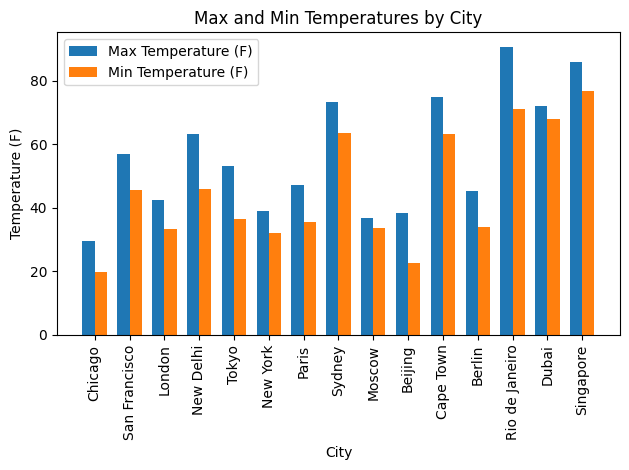

In [5]:
x = np.arange(len(df)) 
width = 0.35  


fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, df['Max Temperature (F)'], width, label='Max Temperature (F)')
bars2 = ax.bar(x + width/2, df['Min Temperature (F)'], width, label='Min Temperature (F)')

ax.set_xlabel('City')
ax.set_ylabel('Temperature (F)')
ax.set_title('Max and Min Temperatures by City')
ax.set_xticks(x)
ax.set_xticklabels(df['City'], rotation=90) 
ax.legend()

# Display the plot
plt.tight_layout()  
plt.show()

In [68]:
# Average snowfall, ran, surface pressure, and wind for cities below. 
# Columns come from two tables thus join is necessary using city, date, and hour as key
query = """
SELECT 
    w.city as \"City\", 
    ROUND(AVG(H.snowfall)::numeric, 6) AS \"Average Snowfall (m)\", 
    ROUND(AVG(H.rain)::numeric, 6) AS \"Average Rain\", 
    ROUND(AVG(W.surface_pressure)::numeric, 4) AS \"Average Surface Pressure (hPA)\", 
    ROUND(AVG(W.wind_speed_10m)::numeric, 4) AS \"Average Wind speed (10mph)\"
FROM 
    hourly_precipitation_evaporation as H 
JOIN 
    hourly_wind_atmospheric_conditions as W 
    ON W.hour = H.hour AND W.city = H.city AND W.date = H.date 
WHERE 
    W.forecast_data = False AND H.forecast_data = False 
GROUP BY 
    w.city
    """

In [69]:
df = pd.read_sql(query, engine)
display(df)

,City,Average Snowfall (m),Average Rain,Average Surface Pressure (hPA),Average Wind speed (10mph)
0,Cape Town,0.000000,0.000000,1011.6291,6.8723
1,Paris,0.000000,0.010540,1017.5577,4.2066
2,London,0.000000,0.000000,1017.4118,5.9641
3,Beijing,0.000000,0.000000,1019.3009,2.7249
4,Sydney,0.000000,0.000000,1007.6335,6.1508
5,New York,0.000000,0.000000,1007.8413,11.3747
6,Tokyo,0.000000,0.000000,1010.7293,2.5098
7,San Francisco,0.000000,0.001761,1018.8437,5.1096
8,Berlin,0.004306,0.000739,1010.1047,8.4875
9,New Delhi,0.000000,0.000000,993.0647,2.0093


The code below runs three SQL queries to retrieve and compare weather data for Dubai on January 2nd and 3rd, 2025. The first two queries fetch temperature data for two different forecast states (True for Jan 2nd and False for Jan 3rd), while the third query calculates the temperature differences between the two days for each hour.

In [51]:


queryForecastTrue = """
SELECT 
    temperature_2m AS "Temperature 2m Above", 
    temperature_80m AS "Temperature 80m Above", 
    temperature_120m AS "Temperature 120m Above"
FROM 
    hourly_weather_conditions 
WHERE 
    forecast_data = True 
    AND date = '2025-01-02' 
    AND city = 'Dubai'
"""

queryForecastFalse = """
SELECT 
    temperature_2m AS "Temperature 2m Above", 
    temperature_80m AS "Temperature 80m Above", 
    temperature_120m AS "Temperature 120m Above"
FROM 
    hourly_weather_conditions 
WHERE 
    forecast_data = False 
    AND date = '2025-01-03' 
    AND city = 'Dubai'
"""


queryDiff = """
SELECT 
    W1.hour as "Hour",
    (W1.temperature_2m - W2.temperature_2m) AS "Temperature Difference (2m)",
    (W1.temperature_80m - W2.temperature_80m) AS "Temperature Difference (80m)",
    (W1.temperature_120m - W2.temperature_120m) AS "Temperature Difference (120m)"
FROM 
    hourly_weather_conditions AS W1
JOIN 
    hourly_weather_conditions AS W2
    ON W1.city = W2.city  -- added the join condition here
        AND W1.hour = W2.hour  -- added condition to join based on hour

WHERE 
    W1.date = '2025-01-02' 
    AND W1.forecast_data = True 
    AND W2.date = '2025-01-03' 
    AND W2.forecast_data = False
    AND W1.city = 'Dubai' 
    AND W2.city = 'Dubai'
"""

dfForecastTrue = pd.read_sql(queryForecastTrue, engine)
dfForecastFalse = pd.read_sql(queryForecastFalse, engine)
dfDiff = pd.read_sql(queryDiff, engine)

In [52]:
display(dfForecastTrue)

,Temperature 2m Above,Temperature 80m Above,Temperature 120m Above
0,68.9036,67.3736,66.1136
1,68.8136,67.1936,65.9336
2,68.9936,67.3736,66.1136
3,68.9936,67.3736,66.1136
4,69.2636,67.5536,66.1136
5,70.0736,67.7336,66.4736
6,71.4236,68.2736,67.0136
7,72.0536,68.4536,67.0136
8,72.5036,68.6336,67.1936
9,72.5936,68.4536,67.0136


In [53]:
display(dfForecastFalse)

,Temperature 2m Above,Temperature 80m Above,Temperature 120m Above
0,60.5336,62.1536,62.8736
1,60.2636,61.9736,62.8736
2,60.4436,61.7936,62.6936
3,60.1736,61.2536,61.9736
4,60.4436,61.0736,61.7936
5,62.4236,61.4336,62.1536
6,65.6636,62.5136,62.3336
7,68.9936,65.3936,63.9536
8,70.9736,67.0136,65.5736
9,71.6936,67.3736,66.1136


In [54]:
display(dfDiff)

,Hour,Temperature Difference (2m),Temperature Difference (80m),Temperature Difference (120m)
0,0,8.37,5.22,3.24
1,1,8.55,5.22,3.06
2,2,8.55,5.58,3.42
3,3,8.82,6.12,4.14
4,4,8.82,6.48,4.32
5,5,7.65,6.30,4.32
6,6,5.76,5.76,4.68
7,7,3.06,3.06,3.06
8,8,1.53,1.62,1.62
9,9,0.90,1.08,0.90


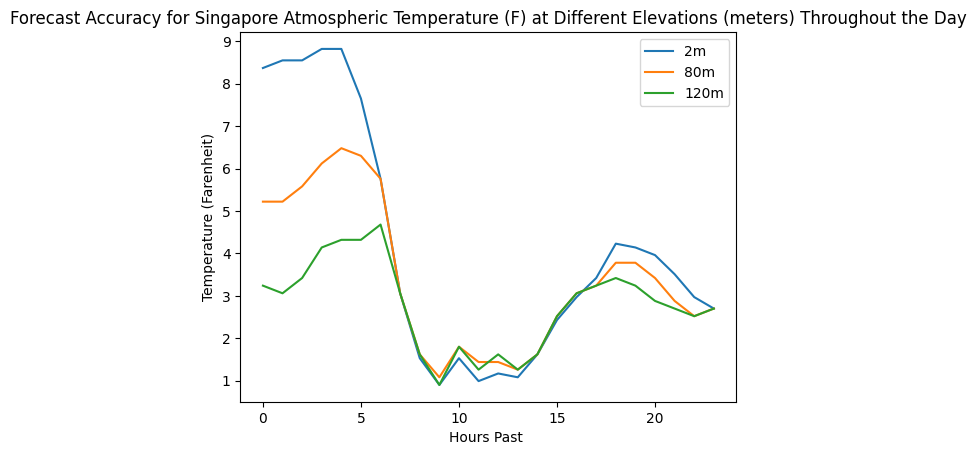

In [56]:

# Sample data
x = dfDiff['Hour']  # x-axis values
y1 = dfDiff['Temperature Difference (2m)']  # y-axis values for the first line
y2 = dfDiff['Temperature Difference (80m)']
y3 = dfDiff['Temperature Difference (120m)']

# Plotting the three lines
plt.plot(x, y1, label='2m')  # First line
plt.plot(x, y2, label='80m')  # Second line
plt.plot(x, y3, label='120m')  # Third line

# Adding titles and labels
plt.title('Forecast Accuracy for Singapore Atmospheric Temperature (F) at Different Elevations (meters) Throughout the Day')
plt.xlabel('Hours Past ')
plt.ylabel('Temperature (Farenheit)')

# Show legend
plt.legend()

# Display the graph
plt.show()


In [77]:
query = """
SELECT
     H.city AS "City",
     H.date AS "Date",
     H.hour AS "Hour",
     H.temperature_2m AS "Temperature at 2m (°F)",
     H.temperature_80m AS "Temperature at 80m (°F)",
     H.temperature_120m AS "Temperature at 120m (°F)",
     S.soil_temperature_0cm AS "Soil Temperature at 0cm (°F)",
     S.soil_temperature_6cm AS "Soil Temperature at 6cm (°F)",
     S.soil_temperature_18cm AS "Soil Temperature at 18cm (°F)",
     W.wind_speed_10m AS "Wind Speed at 10m (mph",
     W.wind_speed_80m AS "Wind Speed at 80m (mph)",
     W.wind_speed_120m AS "Wind Speed at 120m (mph)",
     M.heat_index AS "Heat Index (°F)",
     M.wind_chill AS "Wind Chill (°F)",
     M.precipitation_rate AS "Precipitation Rate (mm/h)",
     M.potential_evapotranspiration AS "Potential Evapotranspiration (mm)",
     M.atmospheric_pressure_diff AS "Atmospheric Pressure Difference (hPA)"
 FROM
     hourly_weather_conditions H
 JOIN
     hourly_soil_conditions S ON H.city = S.city AND H.date = S.date AND H.hour = S.hour
 JOIN
     hourly_wind_atmospheric_conditions W ON H.city = W.city AND H.date = W.date AND H.hour = W.hour
 JOIN
     meteorological_calculations M ON H.city = M.city AND H.date = M.date AND H.hour = M.hour
 WHERE
     H.forecast_data = TRUE
     AND S.forecast_data = TRUE
     AND W.forecast_data = TRUE
     AND M.forecast_data = TRUE
     AND H.city = 'San Francisco'
     AND H.date BETWEEN '2025-01-01' AND '2025-01-07' 
 ORDER BY
     H.date, H.hour
     """

df = pd.read_sql(query, engine)

In [78]:
df.head()

,City,Date,Hour,Temperature at 2m (°F),Temperature at 80m (°F),Temperature at 120m (°F),Soil Temperature at 0cm (°F),Soil Temperature at 6cm (°F),Soil Temperature at 18cm (°F),Wind Speed at 10m (mph,Wind Speed at 80m (mph),Wind Speed at 120m (mph),Heat Index (°F),Wind Chill (°F),Precipitation Rate (mm/h),Potential Evapotranspiration (mm),Atmospheric Pressure Difference (hPA)
0,San Francisco,2025-01-01,0,53.9717,53.6846,53.5046,54.8276,57.1676,51.9476,1.1407,1.5818,7.1660,89.5539,56.3366,0.0,0.6723,2.1987
1,San Francisco,2025-01-01,1,49.9217,53.0546,52.9646,52.4876,55.3676,52.3076,5.3173,5.4060,7.4548,75.5252,47.9416,0.0,0.4766,2.2166
2,San Francisco,2025-01-01,2,48.1217,52.6046,52.6046,50.8676,53.2076,52.4876,5.9439,10.3629,6.0280,64.5363,45.4610,0.0,0.0000,2.2252
3,San Francisco,2025-01-01,3,46.8617,52.5146,52.5146,49.9676,51.3176,52.5776,8.8496,12.5949,3.2691,60.5825,42.5870,0.0,0.0000,2.2318
4,San Francisco,2025-01-01,4,47.1317,52.1546,51.9746,49.6076,50.0576,52.4876,5.3781,8.8637,3.3943,62.6685,44.6122,0.0,0.8427,2.2297


In [79]:
df.tail()

,City,Date,Hour,Temperature at 2m (°F),Temperature at 80m (°F),Temperature at 120m (°F),Soil Temperature at 0cm (°F),Soil Temperature at 6cm (°F),Soil Temperature at 18cm (°F),Wind Speed at 10m (mph,Wind Speed at 80m (mph),Wind Speed at 120m (mph),Heat Index (°F),Wind Chill (°F),Precipitation Rate (mm/h),Potential Evapotranspiration (mm),Atmospheric Pressure Difference (hPA)
67,San Francisco,2025-01-03,19,52.1717,53.5046,53.4146,54.1076,52.5776,52.0376,4.4796,5.8076,5.7763,57.8048,51.0720,0.0079,1.1684,2.1985
68,San Francisco,2025-01-03,20,53.9717,54.4046,54.2246,55.1876,53.5676,52.2176,5.7730,12.5212,13.9448,61.7070,52.5014,0.0000,1.4217,2.1899
69,San Francisco,2025-01-03,21,55.8617,53.6846,53.4146,56.2676,54.7376,52.3976,9.4193,13.6915,21.5947,65.2355,53.4654,0.0000,1.4526,2.1810
70,San Francisco,2025-01-03,22,56.4017,53.7746,53.4146,55.9076,55.5476,52.6676,11.2207,17.5401,23.1017,68.6624,53.6584,0.0000,1.2595,2.1794
71,San Francisco,2025-01-03,23,56.5817,53.7746,53.4146,55.3676,55.8176,52.8476,11.9381,18.1252,19.9116,67.1867,53.7139,0.0000,1.2420,2.1797
